## 1. Dataset Introduction:

The dataset contains information related to diabetes, comprising various health-related features of individuals. Each row represents a different individual, and the columns provide details about their health attributes. Below are the headers of the dataset along with a brief description of each feature:

- **Pregnancies**: Number of times pregnant.
- **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
- **Blood Pressure**: Diastolic blood pressure (mm Hg).
- **SkinThickness**: Triceps skin fold thickness (mm).
- **Insulin**: 2-Hour serum insulin (mu U/ml).
- **BMI**: Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).
- **Age**: Age of the individual (years).
- **Outcome**: Binary variable indicating whether the individual has diabetes (1) or not (0).

This dataset will be used for predicting the likelihood of diabetes based on various health indicators and it will be employed in machine learning and predictive modeling tasks.


*Exploratory Data Analysis (EDA)* is a crucial step in understanding and summarizing the main characteristics of a dataset.
Here are some of the processes we are gonna perform:
<font color='red'>
-*Data Loading*
-*Data Inspection*
-*Data Cleaning*
-*Summary Statistics*
-*Data Visualization*
-*Feature Engineering*
-*Hypothesis Testing (optional)*
-*Dimensionality Reduction (optional)*
-*Data Preprocessing*
-*Documentation and Reporting*
</font>

In [5]:
import pandas as pd  # For data manipulation and analysis using DataFrame and Series data structures
import numpy as np   # For numerical computing and operations on arrays and matrices
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns   # For creating statistical visualizations with enhanced aesthetics
import plotly.graph_objs as go  # For creating interactive and publication-quality visualizations
#import sklearn   # For machine learning algorithms, data preprocessing, and model evaluation

In [6]:
# Step 1: Data Loading
# Load the dataset into your analysis environment
diabetes_df = pd.read_csv("diabetes (2).csv")

# Step 2: Data Inspection
# Check the first few rows of the dataset
print(diabetes_df.head())

# Check the column names and data types
print(diabetes_df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [5]:
# Step 3: Data Cleaning
# Handle missing values
missing_values = diabetes_df.dropna(inplace=True)  # Drop rows with missing values
# Handle duplicate records
duplicate_rows = diabetes_df.drop_duplicates(inplace=True)  # Remove duplicate rows

print(missing_values) #output should contain null values
print(duplicate_rows) #output should contain null values

None
None


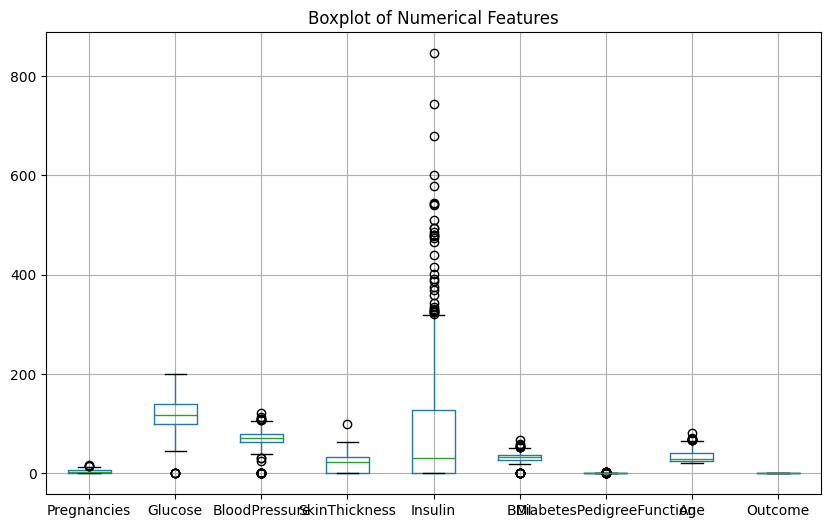

In [7]:
# step4: Outlier detection
# handling outliers. 
# Visualize box plots for numerical features
diabetes_df.boxplot(figsize=(10,6))
plt.title('Boxplot of Numerical Features')
plt.show()

In [8]:
#Calculate summary statistics and use thresholds based on standard deviation, percentile, or IQR (Interquartile Range) to identify outliers.

# Calculate summary statistics
summary_stats = diabetes_df.describe()

# Identify outliers using IQR method
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = ((diabetes_df < lower_bound) | (diabetes_df > upper_bound)).any(axis=1)

#
print(summary_stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [9]:
print (Q1)
print (Q3)
print (lower_bound)
print (upper_bound)


Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 25%, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 75%, dtype: float64
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                  

In [10]:

print (outliers)# shows which numbers have outliers.

0      False
1      False
2      False
3      False
4       True
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [11]:
# Remove outliers
diabetes_df_cleaned = diabetes_df[~outliers]
print(diabetes_df_cleaned)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

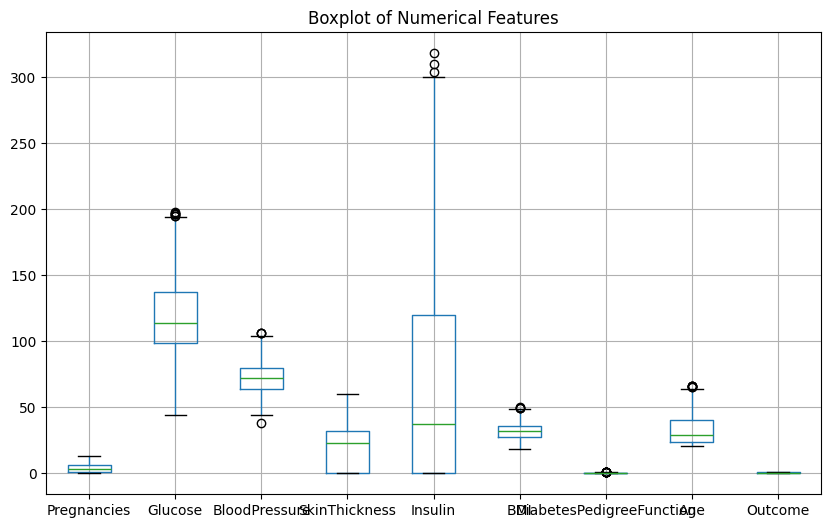

In [12]:
#we will check if there any more outliers left using the boxplot.
diabetes_df_cleaned.boxplot(figsize=(10,6))
plt.title('Boxplot of Numerical Features')
plt.show()

In [27]:
import numpy as np

# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=2.3):
    z_scores = np.abs((diabetes_df_cleaned - np.mean(diabetes_df_cleaned, axis=0)) / np.std(diabetes_df_cleaned, axis=0))
    return z_scores >= threshold

# Example usage:
# Assuming 'data' is your numerical dataset
outliers_1 = detect_outliers_zscore(diabetes_df_cleaned)

# Print the indices of outliers
print("Indices of outliers:", np.where(outliers_1)[0])


# Print the indices of outliers
print("Indices of outliers:", np.where(outliers_1)[0])


Indices of outliers: [ 14  20  22  41  41  43  43  44  44  47  57  58  63  67  73  79  92 103
 105 117 119 124 124 125 131 151 169 169 170 175 178 178 183 208 208 212
 214 216 217 219 223 228 241 244 256 261 261 265 273 275 275 284 293 294
 294 295 296 301 307 308 308 315 316 316 325 334 337 340 349 356 357 361
 361 374 376 381 391 395 399 400 400 400 405 409 419 420 422 428 450 450
 460 464 464 477 478 483 483 488 489 493 502 524 543 544 546 555 556 560
 562 586 613 616 616 617 618 619 620 626 630 634]
Indices of outliers: [ 14  20  22  41  41  43  43  44  44  47  57  58  63  67  73  79  92 103
 105 117 119 124 124 125 131 151 169 169 170 175 178 178 183 208 208 212
 214 216 217 219 223 228 241 244 256 261 261 265 273 275 275 284 293 294
 294 295 296 301 307 308 308 315 316 316 325 334 337 340 349 356 357 361
 361 374 376 381 391 395 399 400 400 400 405 409 419 420 422 428 450 450
 460 464 464 477 478 483 483 488 489 493 502 524 543 544 546 555 556 560
 562 586 613 616 616 617 618 619

In [28]:
# Remove outliers
diabetes_df_cleaned_1 = diabetes_df_cleaned[~outliers_1]
print(diabetes_df_cleaned)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35      0.0  33.6   
1              1       85           66.0             29      0.0  26.6   
2              8      183           64.0              0      0.0  23.3   
3              1       89           66.0             23     94.0  28.1   
5              5      116           74.0              0      0.0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48    180.0  32.9   
764            2      122           70.0             27      0.0  36.8   
765            5      121           72.0             23    112.0  26.2   
766            1      126           60.0              0      0.0  30.1   
767            1       93           70.0             31      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

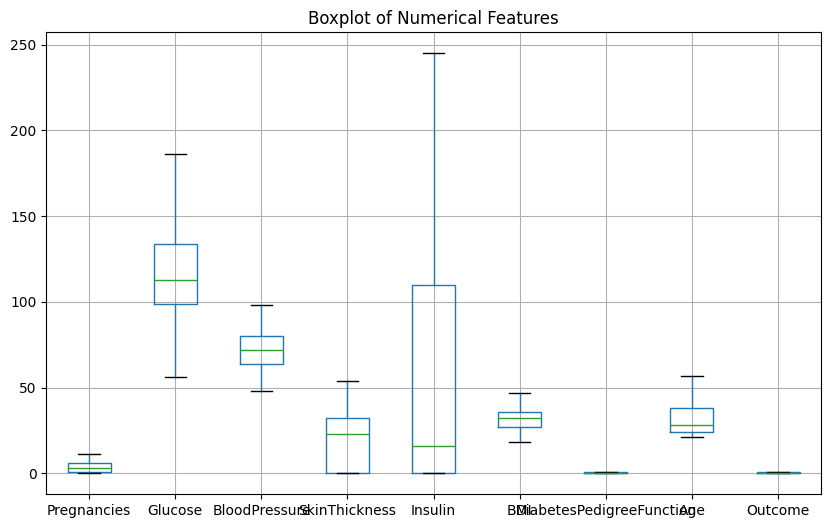

In [29]:
#we will check if there any more outliers left using the boxplot.
diabetes_df_cleaned_1.boxplot(figsize=(10,6))
plt.title('Boxplot of Numerical Features')
plt.show()

In [32]:
# Get information about the DataFrame
print(diabetes_df_cleaned_1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               623 non-null    float64
 1   Glucose                   620 non-null    float64
 2   BloodPressure             625 non-null    float64
 3   SkinThickness             638 non-null    float64
 4   Insulin                   617 non-null    float64
 5   BMI                       630 non-null    float64
 6   DiabetesPedigreeFunction  617 non-null    float64
 7   Age                       612 non-null    float64
 8   Outcome                   639 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 49.9 KB
None


In [36]:
# Get summary statistics for numerical columns
print("DataFrame information:")
print(diabetes_df_cleaned_1.describe())

DataFrame information:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   623.000000  620.000000     625.000000     638.000000  617.000000   
mean      3.581059  117.109677      71.995200      20.501567   58.340357   
std       2.984326   26.595593      10.532838      15.272177   69.779343   
min       0.000000   56.000000      48.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  113.000000      72.000000      23.000000   16.000000   
75%       6.000000  134.000000      80.000000      32.000000  110.000000   
max      11.000000  186.000000      98.000000      54.000000  245.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  630.000000                617.000000  612.000000  639.000000  
mean    31.770476                  0.404982   31.439542    0.312989  
std      6.166958                  0.219236    9.448869    0.464073  
min     18.2

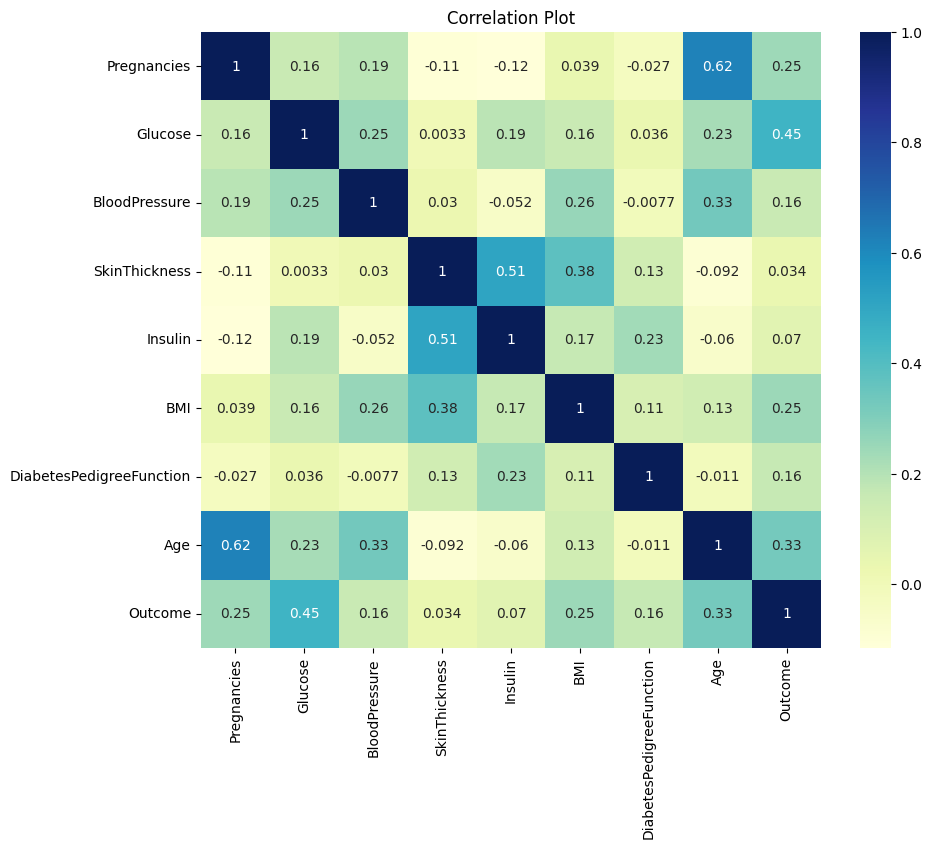

In [38]:

# Get correlation between numerical columns
corr = diabetes_df_cleaned_1.select_dtypes(include=['float64', 'int64']).corr()
# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Plot")
plt.show()

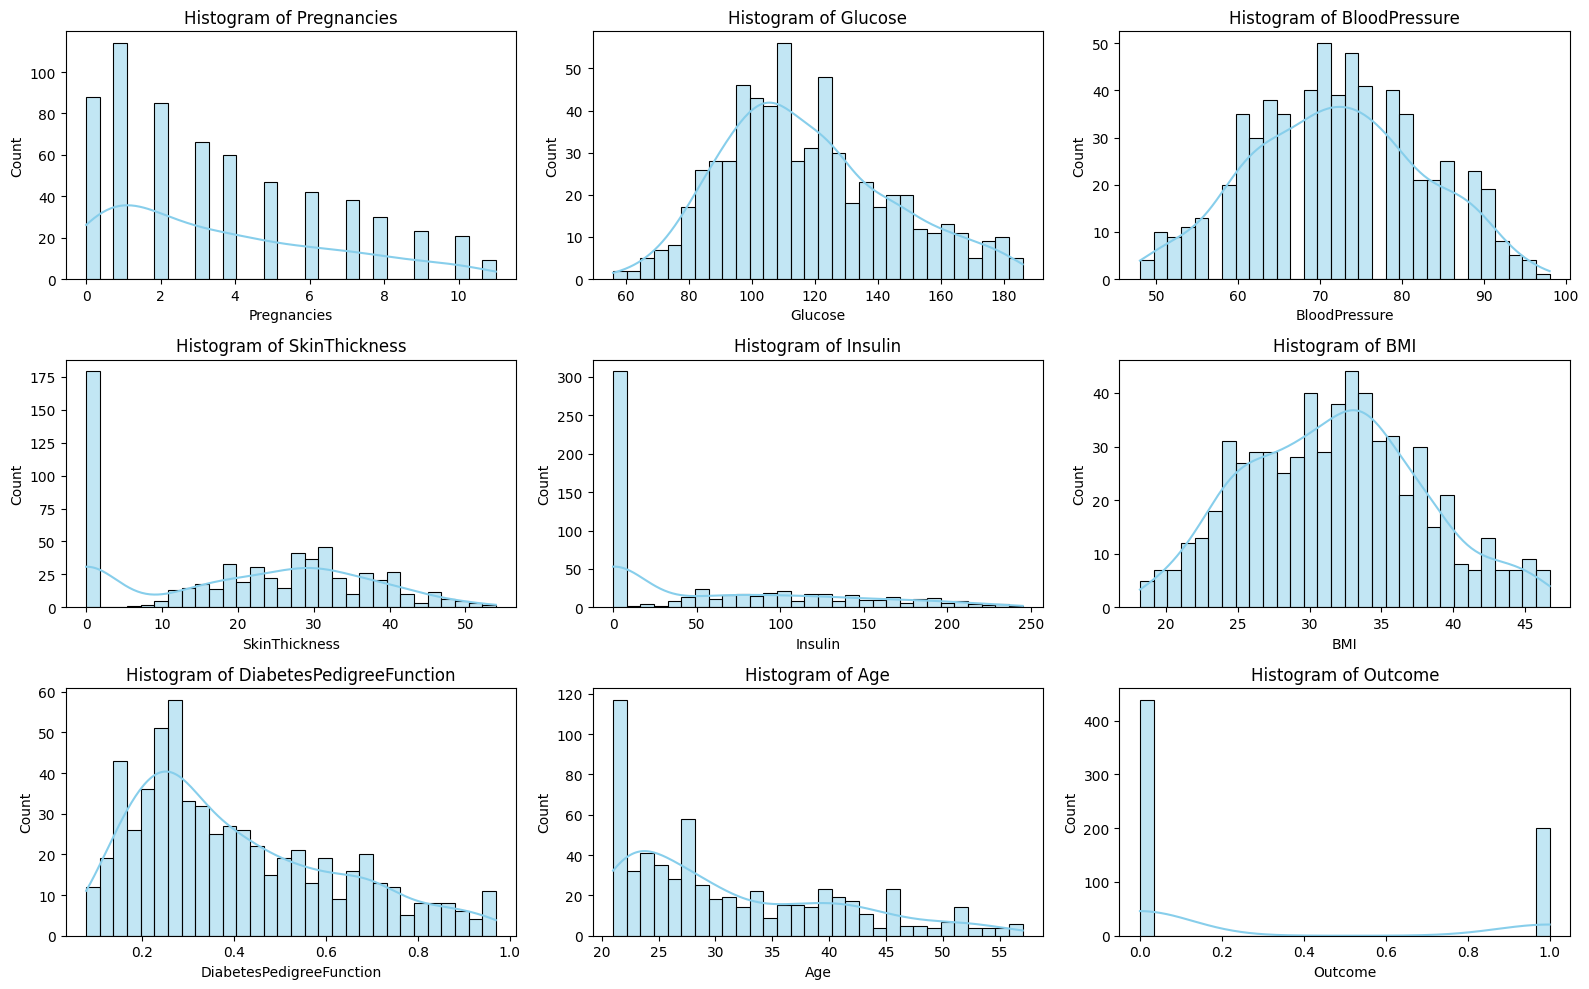

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(16, 10))

# Loop through each column and plot its histogram
for i, column in enumerate(diabetes_df_cleaned_1.columns):
    plt.subplot(3, 3, i + 1)  # Create subplot for each column
    sns.histplot(diabetes_df_cleaned_1[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {column}')  # Set title for each subplot
    plt.xlabel(column)  # Set x-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [49]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


# Define numerical and categorical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']  # Assuming 'Outcome' is categorical

# Define preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))  # Add polynomial features
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Apply preprocessing to the dataset
diabetes_df_processed = preprocessor.fit_transform(diabetes_df_cleaned_1)




AttributeError: module 'scipy.sparse' has no attribute 'linalg'